# Problem 1

다음은 regression 에 대한 문제이다. 이용하는 데이터의 이름은 “regression_data”이며, 사이버
캠퍼스에서 받을 수 있다. 데이터의 dimension은 (731, 10)으로 이는 731개의 observation이 있
으며 1개의 target column과 9개의 feature column으로 구성되었음을 의미한다. 이 데이터는 bike 
sharing에 관한 데이터로 한 시간당 대여된 자전거의 개수에 대한 정보를 담고 있다. 따라서,
target column은 cnt이며 나머지 9개의 column은 feature column이다.
- 데이터 변수에 대한 설명은 아래의 url을 참고할 것.
https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
- random seed 설정에 유의할 것.


[데이터 변수에 관한 설명]


- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered



(a) 데이터를 불러온 후 처음 4줄을 출력하시오

In [1]:
import pandas as pd
import numpy as np
myreg=pd.read_csv('regression_data.csv')
myreg.head(4)

,season,yr,mnth,holiday,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,0.200000,0.590435,0.160296,1562


(b) Scatter plot(pair plot)을 그리고 그 결과에 대해서 논하시오

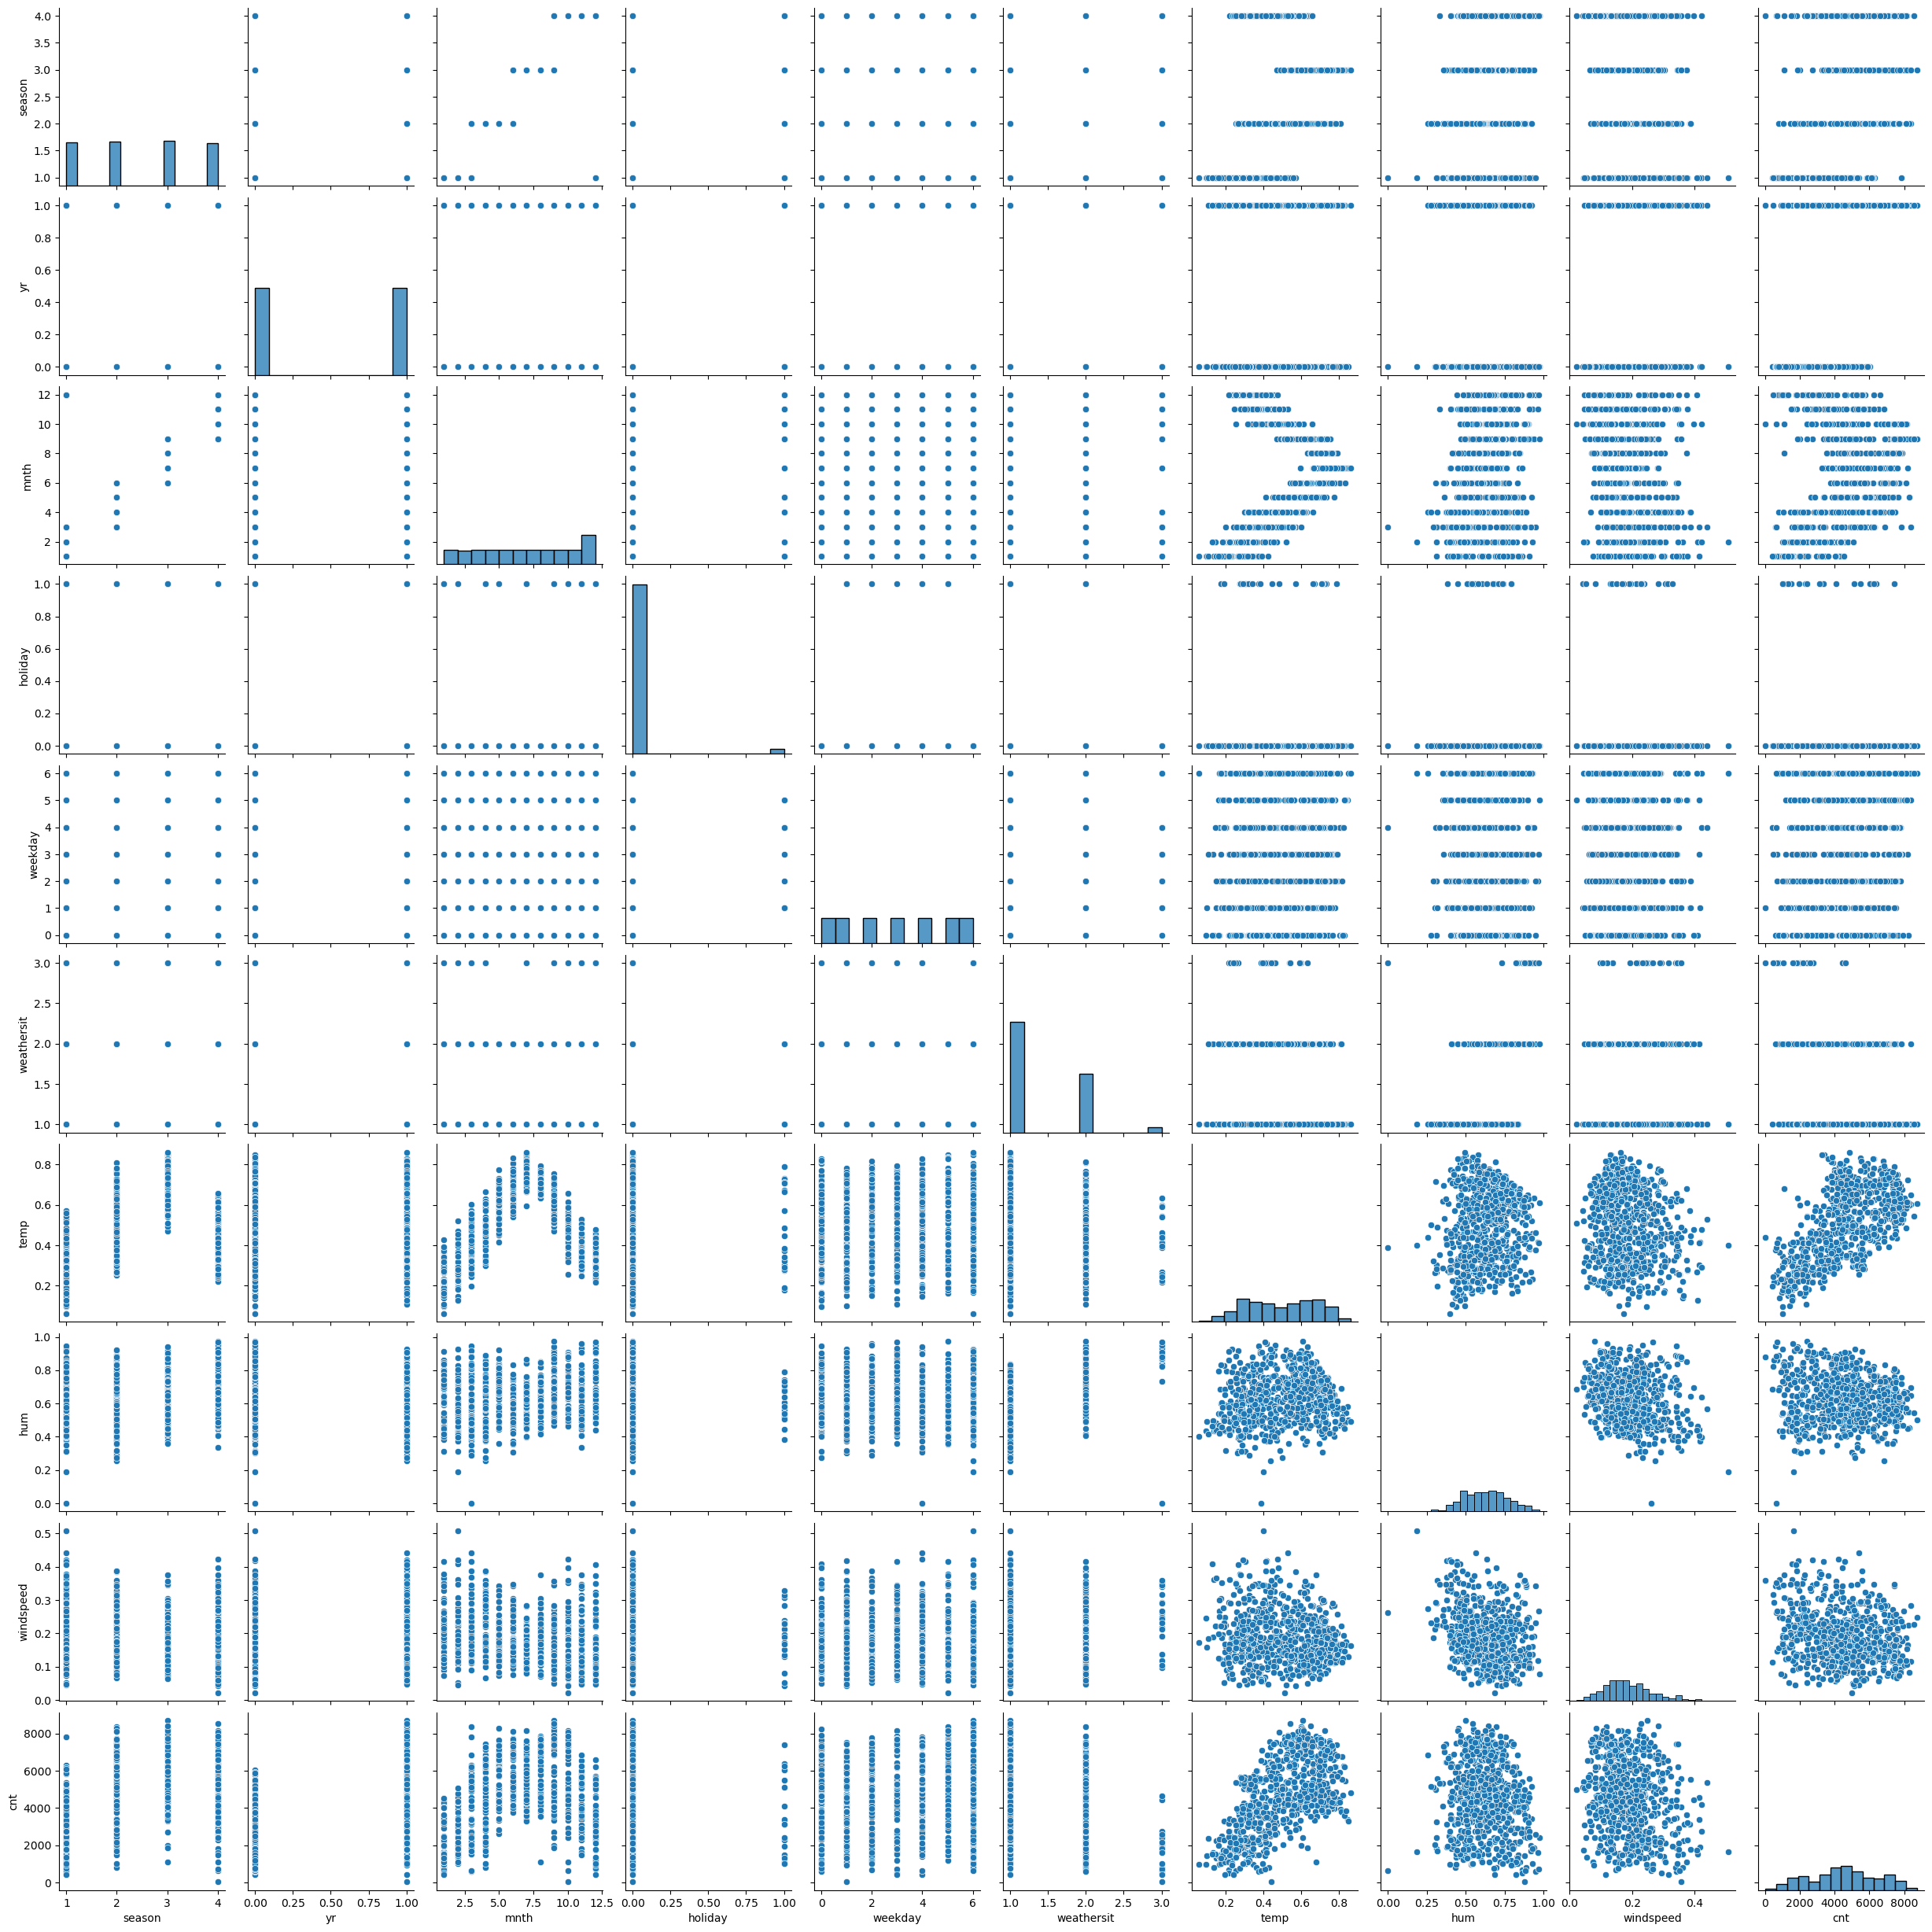

In [2]:
import seaborn as sns
sns.pairplot(data=myreg)

> - temp와 cnt간의 correlation이 높아보인다.  
> - categorical variable인 'season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'에 대한 인코딩이 필요해보인다. 

(c) 필요한 변수에 대하여 one-hot encoding 과 label encoding 을 하시오.

In [3]:
myreg.info() #categorical variable 확인, 모든 데이터가 이미 숫자형이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   hum         731 non-null    float64
 8   windspeed   731 non-null    float64
 9   cnt         731 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [4]:
# One-Hot Encoding for season, weathersit
import pandas as pd
myreg_new=pd.get_dummies(data=myreg, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit'])
myreg_new.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,801,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
#cnt(target data)는 numeric 변수이므로 label encoding이 필요없어보인다.

(d) Data를 x(feature), y(target)로 분리하시오.

In [6]:
Y=myreg_new.iloc[:,3]
myreg_new.pop('cnt')
X=myreg_new.iloc[:,:]

In [7]:
X.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0.363478,0.696087,0.248539,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1,0,0,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [8]:
Y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

(e) Data를 train/test data로 split 하시오. (train:test = 3:1, random seed = 777)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=1/4, random_state=777)

(f) MLR, regression tree, Gradient Boosting, XGBoost에 대하여 model fitting 후 다음 표를 작성하시
오. (각 model의 hyperparameter 설정을 반드시 지킬 것)
- regression tree option:
max_depth = 3
- Gradient Boosting hyperparameter option:
max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777
- XGBoost hyperparameter option:
max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777


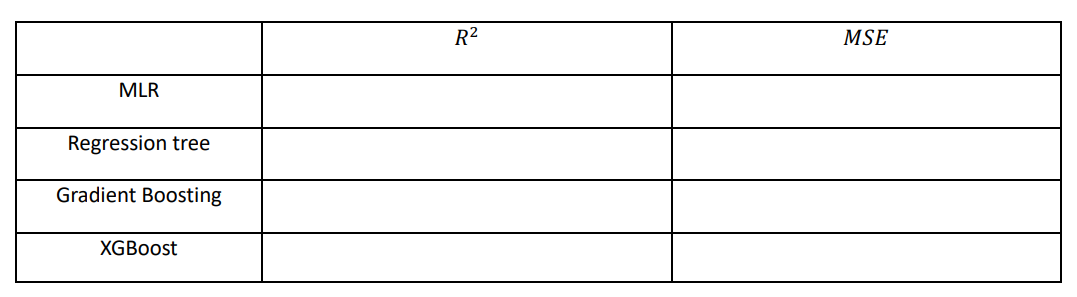


#### 1) MLR

In [11]:
# model fitting
from sklearn.linear_model import LinearRegression
mymlr=LinearRegression()
mymlr.fit(X_train,Y_train)
LinearRegression
y_pred_mlr=mymlr.predict(X_test)
# R-squared
from sklearn.metrics import r2_score
print('R-squared :', round(r2_score(Y_test, y_pred_mlr), 3))
# MSE
from sklearn.metrics import mean_squared_error 
print('MSE :', round(mean_squared_error(Y_test, y_pred_mlr)))

R-squared : 0.776
MSE : 773554


#### 2) Regression Tree

In [12]:
# model fitting
from sklearn.tree import DecisionTreeRegressor
myrt=DecisionTreeRegressor(max_depth = 3)
myrt.fit(X_train, Y_train)
y_predict_rt=myrt.predict(X_test)
# R-squared
print('R-squared :', round(r2_score(Y_test, y_predict_rt), 3))
# MSE
from sklearn.metrics import mean_squared_error 
print('MSE :', round(mean_squared_error(Y_test,y_predict_rt)))

R-squared : 0.75
MSE : 860226


#### 3) Gradient Boosting

In [13]:
# model fitting
from sklearn.ensemble import GradientBoostingRegressor
mygbt=GradientBoostingRegressor(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
mygbt.fit(X_train, Y_train)
y_pred_gbt=mygbt.predict(X_test)

# R-squared
print('R-squared :', round(r2_score(Y_test, y_pred_gbt), 3))
# MSE
from sklearn.metrics import mean_squared_error 
print('MSE :', round(mean_squared_error(Y_test,y_pred_gbt)))

R-squared : 0.881
MSE : 408907


#### 4) XGBoost

In [14]:
# model fitting
import xgboost
myxgb=xgboost.XGBRegressor(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
myxgb.fit(X_train, Y_train)
y_pred_xgb=myxgb.predict(X_test)

# R-squared
print('R-squared :', round(r2_score(Y_test,y_pred_xgb), 3))
# MSE
from sklearn.metrics import mean_squared_error 
print('MSE :', round(mean_squared_error(Y_test,y_pred_xgb)))

R-squared : 0.882
MSE : 406842


(g) (e)의 결과에 대하여 모델별로 Y vs Y^ plot을 그리시오. (코드와 그림을 함께 첨부할 것.)


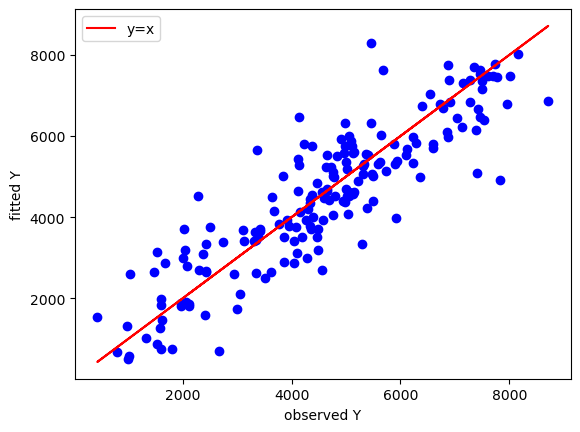

In [15]:
# MLR
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred_mlr, color='b')
plt.plot(Y_test, Y_test, color='r', label='y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

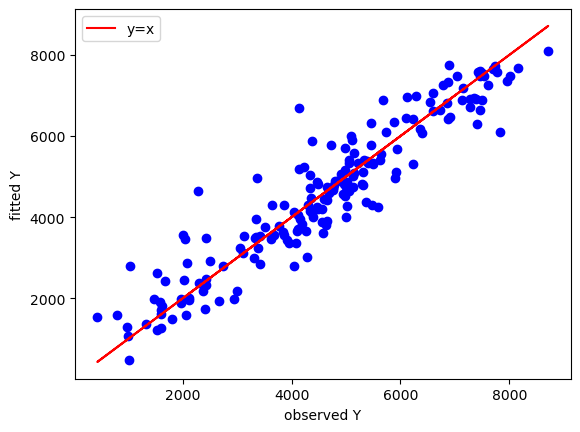

In [16]:
# Gradient Boosting
import matplotlib.pyplot as plt
plt.scatter(Y_test, y_pred_gbt, color='b')
plt.plot(Y_test, Y_test, color='r', label='y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

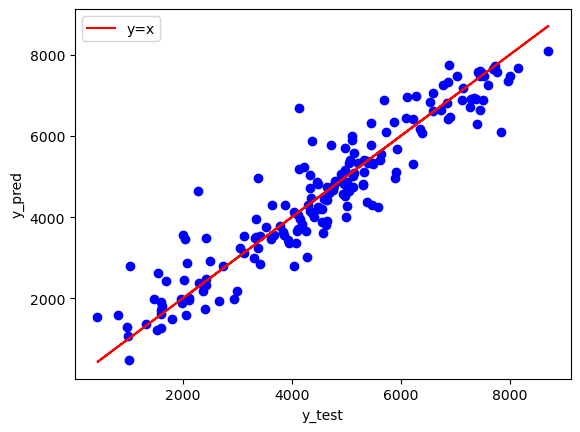

In [17]:
# Gradient Boosting
plt.scatter(Y_test, y_pred_gbt, color='b')
plt.plot(Y_test, Y_test, color='r', label='y=x')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

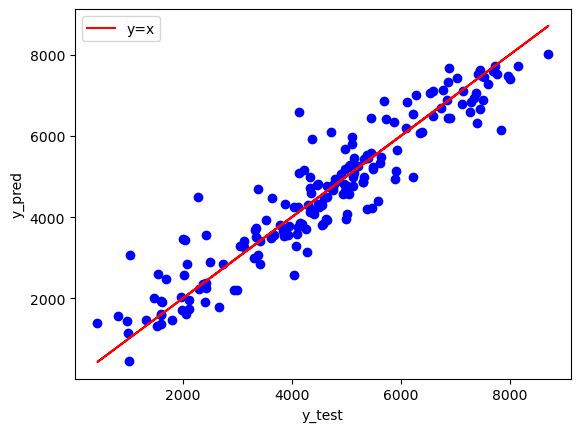

In [18]:
# XGB Boosting
plt.scatter(Y_test, y_pred_xgb, color='b')
plt.plot(Y_test, Y_test, color='r', label='y=x')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

(h) 어떤 모델의 성능이 가장 좋은지 서술하시오.

> R-squared가 0.881로 가장 크고, MSE가 408907로 가장 작은 XGBoost의 성능이 가장 좋다.

# Problem 2
- 다음은 classification에 관한 문제이다. 이용하는 데이터의 이름은 “classification_data”이며, 사이
버캠퍼스에서 받을 수 있다. 데이터의 dimension은 (4521, 17)으로 이는 4521개의 observation이
있으며 1개의 target column과 16개의 feature column으로 구성되었음을 의미한다. 이 데이터는
bank diposit에 관한 데이터로 보증금 대출가능 여부에 대한 정보를 담고 있다. Target column은
y이며 보증금 대출이 가능한 경우 “yes”, 불가능한 경우 “no”로 표기되어 있다.
- random seed 설정에 유의할 것.

(a) 데이터를 불러온 후 처음 4줄을 출력하시오.


In [19]:
import pandas as pd
myclass=pd.read_csv('classification_data.csv', sep=';')
myclass.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


(b) Categorical variable에 대해 histogram을 그리고 그 결과에 대해 논하시오.

In [20]:
import matplotlib.pyplot as plt

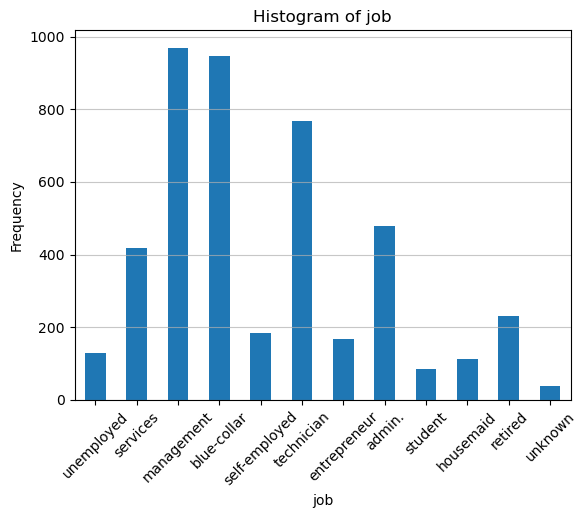

In [21]:
# job
myclass['job'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of job')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

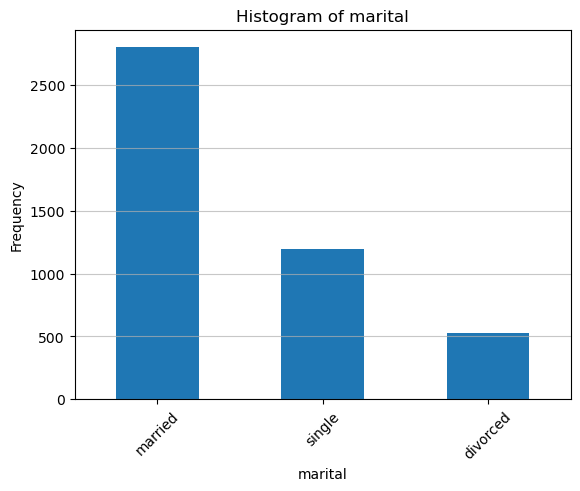

In [22]:
# marital
myclass['marital'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of marital')
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

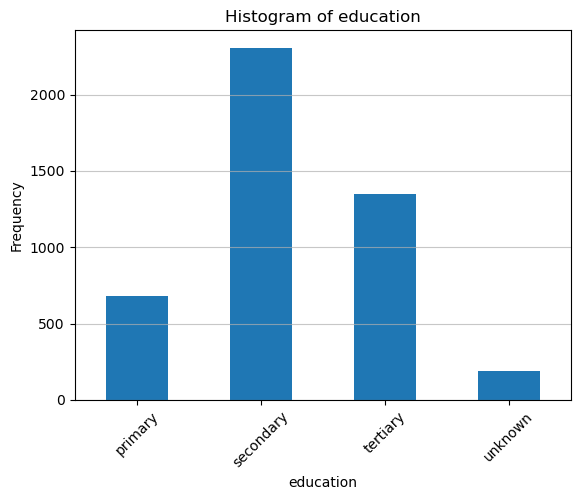

In [23]:
# education
myclass['education'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of education')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

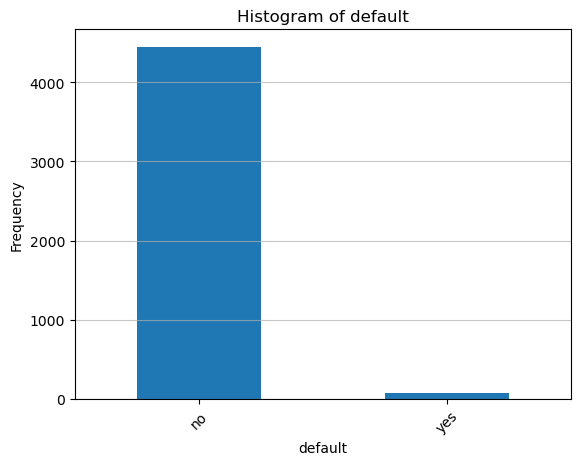

In [24]:
# default
myclass['default'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of default')
plt.xlabel('default')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

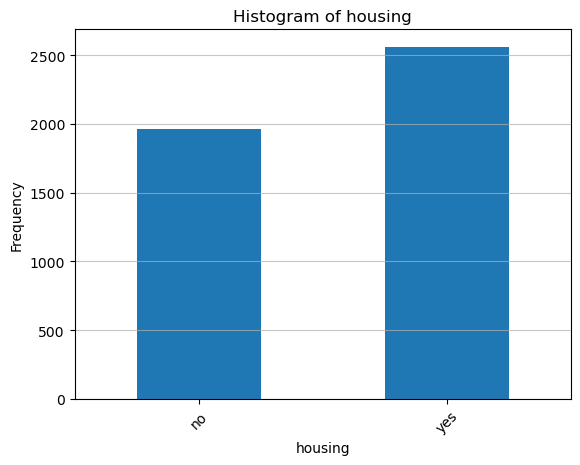

In [25]:
# housing
myclass['housing'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of housing')
plt.xlabel('housing')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

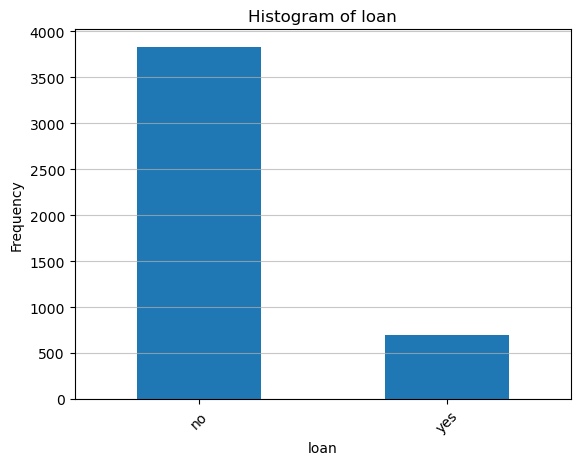

In [26]:
# loan
myclass['loan'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of loan')
plt.xlabel('loan')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

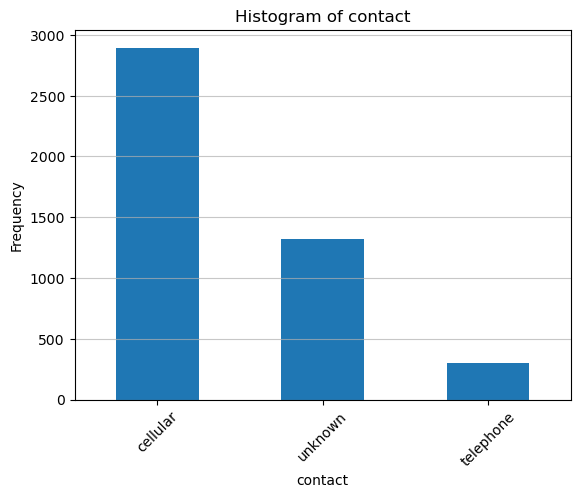

In [27]:
# contact
myclass['contact'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of contact')
plt.xlabel('contact')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

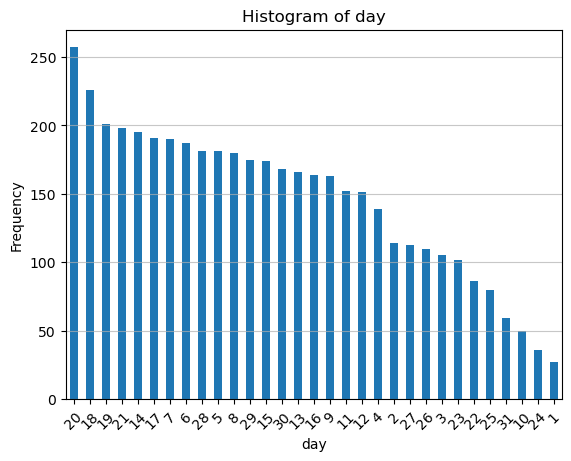

In [28]:
# day
myclass['day'].value_counts(sort=True).plot.bar(rot=45)
plt.title('Histogram of day')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

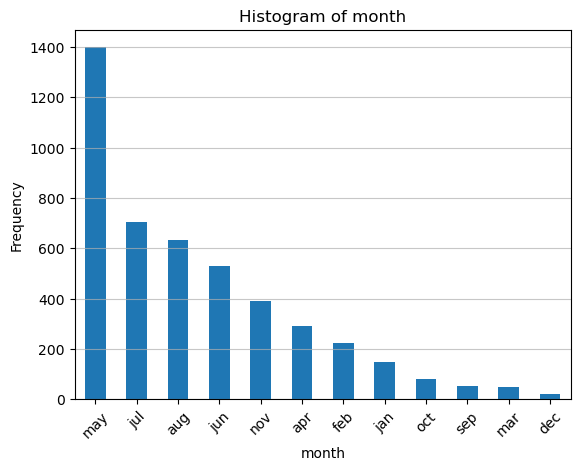

In [29]:
# month
myclass['month'].value_counts(sort=True).plot.bar(rot=45)
plt.title('Histogram of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

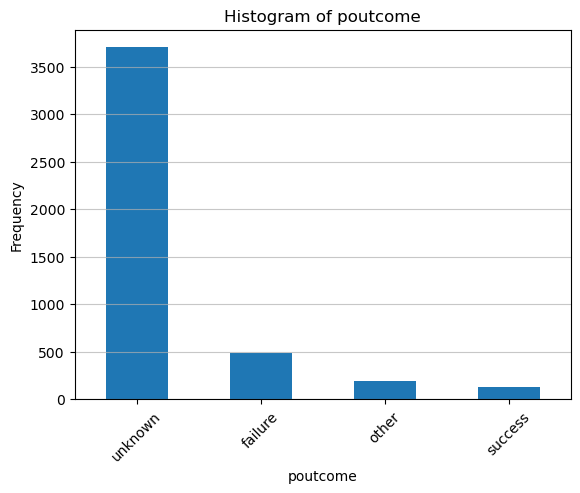

In [30]:
# poutcome
myclass['poutcome'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of poutcome')
plt.xlabel('poutcome')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

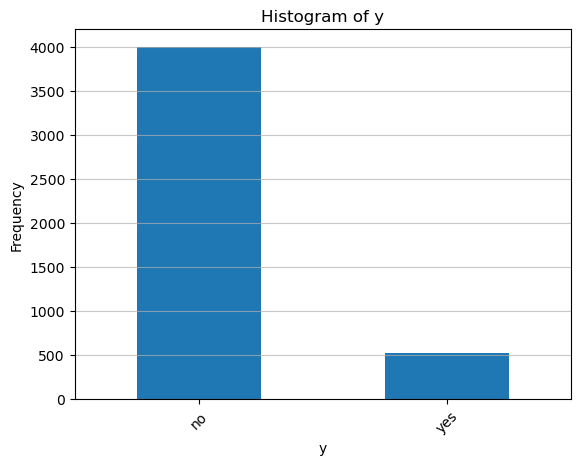

In [31]:
# y
myclass['y'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)
plt.show()

>- job에서는 management의 빈도수가 가장 많고, blue collar의 빈도수가 그 다음으로 많다.
>- martial은 married 빈도수가 가장 많다.
>- education은 secondary 빈도수가 가장 많고, unknown도 꽤 존재한다.
>- default에서 no가 yes의 gap이 크다.
>- housing은 yes의 빈도가 많다.
>- loan은 no가 yes에 비해 많으며, 그 gap이 크다.
>- contact는 cellular가 가장 많다.
>- day는 1이 가장 적고, 20이 가장 많다.
>- month는 may가 가장 많고, december가 가장 적다.
>- poutcome에서는 unknown의 빈도가 가장 크고, 나머지는 아주 적은 수로 비슷하다.
>- y에서는 no가 y에 비해 확연히 많으며, 그 gap이 크다.

(c) 필요한 변수에 대하여 one-hot encoding과 label encoding을 하시오.


In [32]:
import pandas as pd
myclass=pd.read_csv('classification_data.csv', sep=';')
myclass.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [33]:
# one-hot encoding
import pandas as pd
myclass=pd.get_dummies(myclass, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome'])
myclass.head()

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,no,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,220,1,339,4,no,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,185,1,330,1,no,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,199,4,-1,0,no,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,no,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
myclass['y']=le.fit_transform(myclass['y'])
myclass.head()

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,226,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


(d) Data를 X(feature), y(target)으로 분리하시오.


In [35]:
X=myclass.drop('y', axis=1)
Y=myclass['y']

(e) Data를 train/test로 split 하시오. (train:test = 3:1, random_seed = 777)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=1/4, random_state=777)

(f) Decision tree, Gradient Boosting, XGBoost, Bagging, Random Forest에 대하여 model fitting 후 다
음 표를 작성하시오.
- max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777


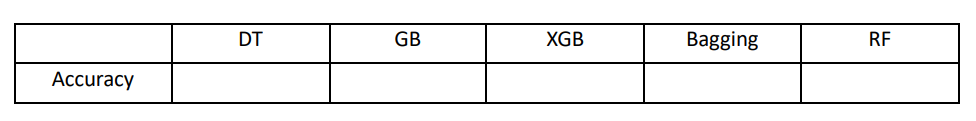

#### 1) Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
mydt=DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=777)
mydt.fit(X_train, Y_train)
# accuracy
y_pred_dt=mydt.predict(X_test)
print('Accuracy :', accuracy_score(Y_test, y_pred_dt))

Accuracy : 0.9018567639257294


#### 2) Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
mygbt=GradientBoostingClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
mygbt.fit(X_train, Y_train)
y_pred_gbt=mygbt.predict(X_test)
# accuracy
print('Accuracy :', accuracy_score(Y_test, y_pred_gbt))

Accuracy : 0.8947833775419982


#### 3) XGBoost

In [39]:
import xgboost
myxgb=xgboost.XGBClassifier(max_depth = 3, n_estimators = 200, learning_rate = 0.1, random_state = 777)
myxgb.fit(X_train, Y_train)
y_pred_xgb=myxgb.predict(X_test)
# accuracy
print('Accuracy :', accuracy_score(Y_test, y_pred_xgb))

Accuracy : 0.8992042440318302


#### 4) Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
mybagging=BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators = 200, random_state = 777, bootstrap=True)
mybagging.fit(X_train, Y_train)
y_pred_bagging = mybagging.predict(X_test)
# accuracy
print('Accuracy :', accuracy_score(Y_test, y_pred_bagging))

Accuracy : 0.9071618037135278


#### 5) Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
myrf = RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 777)
myrf.fit(X_train, Y_train)
y_pred_rf = myrf.predict(X_test)
# accuracy
print('Accuracy :', accuracy_score(Y_test, y_pred_rf))

Accuracy : 0.896551724137931


(g) (e)의 결과에 대하여 모델별로 confution matrix를 구하시오.


In [42]:
# Decision tree
from sklearn.metrics import confusion_matrix
mymtx_dt=confusion_matrix(Y_test, y_pred_dt)
mymtx_dt

array([[978,  36],
       [ 75,  42]], dtype=int64)

In [43]:
# Gradient boosting
mymtx_gbt=confusion_matrix(Y_test, y_pred_gbt)
mymtx_gbt

array([[969,  45],
       [ 74,  43]], dtype=int64)

In [44]:
# XGBoost
mymtx_xgb=confusion_matrix(Y_test, y_pred_xgb)
mymtx_xgb

array([[977,  37],
       [ 77,  40]], dtype=int64)

In [45]:
# Bagging
mymtx_bagging=confusion_matrix(Y_test, y_pred_bagging)
mymtx_bagging

array([[986,  28],
       [ 77,  40]], dtype=int64)

In [46]:
# Random forest
mymtx_rf=confusion_matrix(Y_test, y_pred_rf)
mymtx_rf

array([[1014,    0],
       [ 117,    0]], dtype=int64)

(h) 어떤 모델의 성능이 가장 좋은지 서술하시오.

> Accuracy 값이 0.9071로 가장 큰 bagging 모델의 성능이 가장 좋다. 